<a href="https://colab.research.google.com/github/JCbarajas5/Machine-Learning-Anahuac/blob/main/Bayes_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
data=pd.read_csv("entregas_paqueteria.csv")
data.head()

,Distancia_km,Indice_Trafico,Indice_Clima,Paradas_Previas,Experiencia_Repartidor_meses,Hora_Dia,Zona_Riesgo,Peso_kg,Entrega_Tarde
0,17.22,59.7,3.3,8,58.7,17,0.087,16.64,1
1,1.82,64.2,5.2,6,59.4,16,0.460,11.61,0
2,5.90,55.4,6.7,2,4.4,12,0.473,3.61,0
3,5.02,16.4,0.1,4,13.5,12,0.300,12.27,0
4,4.81,19.2,5.6,6,20.0,12,0.083,17.19,0


In [5]:
data.shape

(650, 9)

In [6]:
X=data.iloc[:, 0:8]
X.head()

,Distancia_km,Indice_Trafico,Indice_Clima,Paradas_Previas,Experiencia_Repartidor_meses,Hora_Dia,Zona_Riesgo,Peso_kg
0,17.22,59.7,3.3,8,58.7,17,0.087,16.64
1,1.82,64.2,5.2,6,59.4,16,0.460,11.61
2,5.90,55.4,6.7,2,4.4,12,0.473,3.61
3,5.02,16.4,0.1,4,13.5,12,0.300,12.27
4,4.81,19.2,5.6,6,20.0,12,0.083,17.19


In [8]:
Y=data.iloc[:, 8]
Y.head()

,Entrega_Tarde
0,1
1,0
2,0
3,0
4,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [10]:
cv_inner= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
pipelines = {
    "KNN"  :Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
    "SVC"  :Pipeline([("scaler", StandardScaler()), ("model", SVC())]),
    "Tree" :Pipeline([ ("model", DecisionTreeClassifier())]),
    "Bayes":Pipeline([("model", GaussianNB())])
}

In [15]:
param_grids={
    "KNN": {"model__n_neighbors": [3,5,7,9], "model__weights": ["uniform", "distance"]},
    "SVC": {"model__C": [0.1, 1, 10], "model__kernel": ["linear", "rbf"]},
    "Tree": {"model__max_depth": [None, 3, 5, 10]},
    "Bayes": {"model__var_smoothing": [1e-9, 1e-8, 1e-7]}
}

In [19]:
best_models={}
results={}

for name in pipelines:
  grid= GridSearchCV(estimator=pipelines[name], param_grid=param_grids[name], cv=cv_inner, scoring="accuracy", n_jobs=-1)
  grid.fit(X_train, Y_train)
  best_models[name]=grid.best_estimator_
  results[name]={"Best params": grid.best_params_, "Best score": grid.best_score_, "Test score": grid.score(X_test, Y_test)}

In [22]:
for name, model in best_models.items():
  y_pred=model.predict(X_test)
  test_accuracy=accuracy_score(Y_test, y_pred)
  results[name]["Test accuracy"]=test_accuracy


In [23]:
pd.set_option("display.max_colwidth", None)
results_df=pd.DataFrame(results).T
results_df

,Best params,Best score,Test score,Test accuracy
KNN,"{'model__n_neighbors': 9, 'model__weights': 'distance'}",0.834615,0.815385,0.815385
SVC,"{'model__C': 1, 'model__kernel': 'rbf'}",0.876923,0.907692,0.907692
Tree,{'model__max_depth': 5},0.905769,0.884615,0.884615
Bayes,{'model__var_smoothing': 1e-09},0.840385,0.892308,0.892308


KNN
              precision    recall  f1-score   support

           0       0.74      0.63      0.68        41
           1       0.84      0.90      0.87        89

    accuracy                           0.82       130
   macro avg       0.79      0.77      0.78       130
weighted avg       0.81      0.82      0.81       130



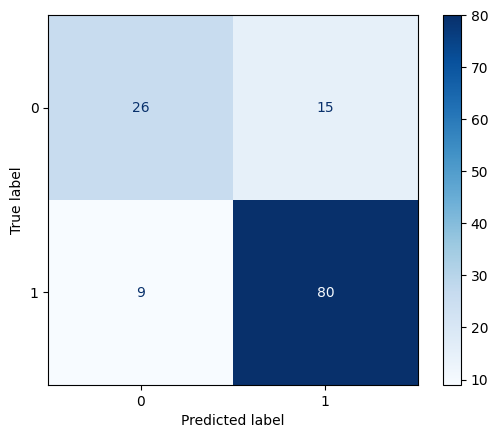

SVC
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.91      0.96      0.93        89

    accuracy                           0.91       130
   macro avg       0.90      0.88      0.89       130
weighted avg       0.91      0.91      0.91       130



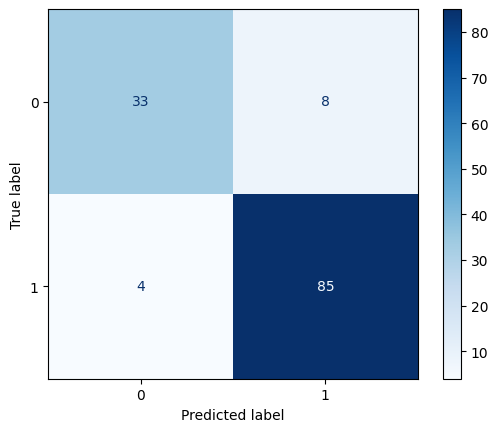

Tree
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.90      0.93      0.92        89

    accuracy                           0.88       130
   macro avg       0.87      0.86      0.86       130
weighted avg       0.88      0.88      0.88       130



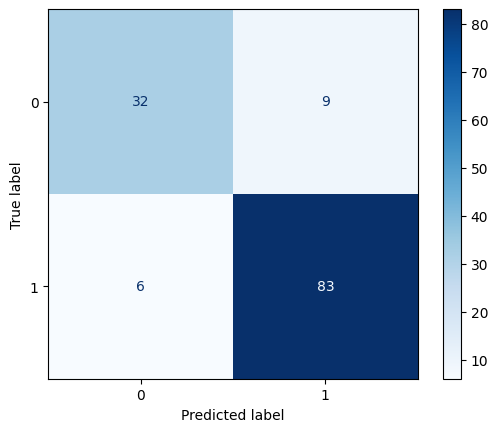

Bayes
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        41
           1       0.88      0.98      0.93        89

    accuracy                           0.89       130
   macro avg       0.91      0.84      0.87       130
weighted avg       0.90      0.89      0.89       130



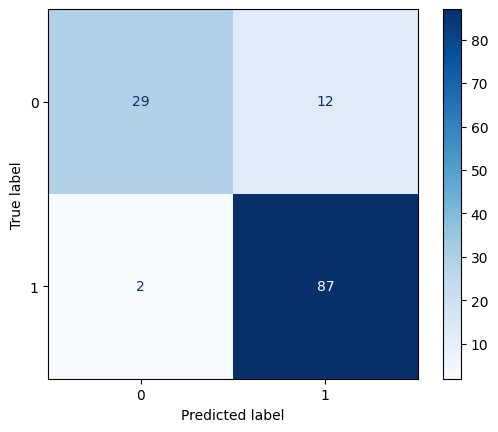

In [24]:
for name, model in best_models.items():
  y_pred=model.predict(X_test)
  print(name)
  print(classification_report(Y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap="Blues")
  plt.show()